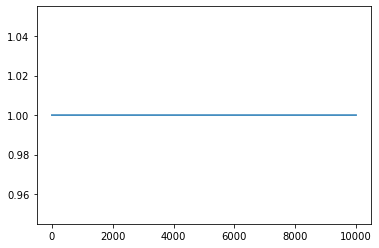

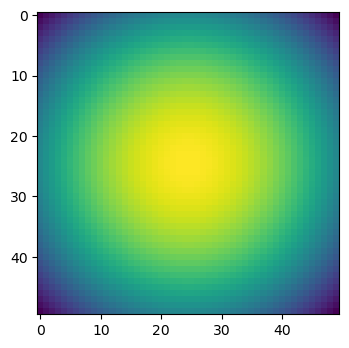

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from offline_RL import q_val_iter, get_q_func, get_policy, get_random_policy, offline_q_val_iter, gen_dataset
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.metrics.pairwise import rbf_kernel

from fnc_compress import *

from tqdm.notebook import tqdm

####Setup the MDP 
n_action = 4
#0 north, 1 east, 2 south, 3 west
grid_dim = 50
n_state = grid_dim * grid_dim
np.random.seed(0)
# rewards = np.random.randint(0,100,size=(n_state,n_action))
#plt.plot(rewards)
np.random.seed(0)
# t_matrix = np.random.rand(n_state,n_action,n_state)
t_matrix = np.zeros((n_state,n_action,n_state))
#plt.figure()
#plt.plot(t_matrix[0][0])
sums = []
success_prob = 0.8
for i in range(n_state):
    # left edge
    # if (i % grid_dim) == 0:
    #     #north west corner
    if i == 0:
        #north
        #t_matrix[i][0][i-grid_dim] = 0
        t_matrix[i][0][i+grid_dim] = 1/2
        #t_matrix[i][0][i-1] = 0
        t_matrix[i][0][i+1] = 1/2
        #east
        #t_matrix[i][1][i-grid_dim] = 0
        t_matrix[i][1][i+grid_dim] = (1-success_prob)
        #t_matrix[i][1][i-1] = 0
        t_matrix[i][1][i+1] = success_prob
        #south
        #t_matrix[i][2][i-grid_dim] = 0
        t_matrix[i][2][i+grid_dim] = success_prob
        #t_matrix[i][2][i-1] = 0
        t_matrix[i][2][i+1] = (1-success_prob)
        #west
        #t_matrix[i][3][i-grid_dim] = 0
        t_matrix[i][3][i+grid_dim] = 1/2
        #t_matrix[i][3][i-1] = 0
        t_matrix[i][3][i+1] = 1/2
    # north east corner
    elif i == (grid_dim-1):
        #north
        #t_matrix[i][0][i-grid_dim] = 0
        t_matrix[i][0][i+grid_dim] = 1/2
        t_matrix[i][0][i-1] = 1/2
        #t_matrix[i][0][i+1] = 0
        #east
        #t_matrix[i][1][i-grid_dim] = 0
        t_matrix[i][1][i+grid_dim] = 1/2 
        t_matrix[i][1][i-1] = 1/2
        #t_matrix[i][1][i+1] = 0
        #south
        #t_matrix[i][2][i-grid_dim] = 0
        t_matrix[i][2][i+grid_dim] = success_prob
        t_matrix[i][2][i-1] = (1-success_prob)
        #t_matrix[i][2][i+1] = 0
        #west
        #t_matrix[i][3][i-grid_dim] = 0
        t_matrix[i][3][i+grid_dim] = (1-success_prob)
        t_matrix[i][3][i-1] = success_prob
        #t_matrix[i][3][i+1] = 0
    # south west corner
    elif i == grid_dim * (grid_dim-1):
        #north
        t_matrix[i][0][i-grid_dim] = success_prob
        #t_matrix[i][0][i+grid_dim] = 0
        #t_matrix[i][0][i-1] = 0
        t_matrix[i][0][i+1] = 1-success_prob
        #east
        t_matrix[i][1][i-grid_dim] = 1-success_prob
        #t_matrix[i][1][i+grid_dim] = 0
        #t_matrix[i][1][i-1] = 0
        t_matrix[i][1][i+1] = success_prob
        #south
        t_matrix[i][2][i-grid_dim] = 1/2
        #t_matrix[i][2][i+grid_dim] = 0
        #t_matrix[i][2][i-1] = 0
        t_matrix[i][2][i+1] = 1/2
        #west
        t_matrix[i][3][i-grid_dim] = 1/2
        #t_matrix[i][3][i+grid_dim] = 0
        #t_matrix[i][3][i-1] = 0
        t_matrix[i][3][i+1] = 1/2
    # south east corner
    elif i == grid_dim * grid_dim - 1:
        #north
        t_matrix[i][0][i-grid_dim] = success_prob
        #t_matrix[i][0][i+grid_dim] = 0
        t_matrix[i][0][i-1] = 1-success_prob
        #t_matrix[i][0][i+1] = 0
        #east
        t_matrix[i][1][i-grid_dim] = 1/2
        #t_matrix[i][1][i+grid_dim] = 0
        t_matrix[i][1][i-1] = 1/2
        #t_matrix[i][1][i+1] = 0
        #south
        t_matrix[i][2][i-grid_dim] = 1/2
        #t_matrix[i][2][i+grid_dim] = 0
        t_matrix[i][2][i-1] = 1/2
        #t_matrix[i][2][i+1] = 0
        #west
        t_matrix[i][3][i-grid_dim] = (1-success_prob)
        #t_matrix[i][3][i+grid_dim] = 0
        t_matrix[i][3][i-1] = success_prob
        #t_matrix[i][3][i+1] = 0
    # north border not in corners
    elif i < grid_dim:
        #north 
        #t_matrix[i][0][i-grid_dim] = 0
        t_matrix[i][0][i+grid_dim] = 1/3
        t_matrix[i][0][i-1] = 1/3
        t_matrix[i][0][i+1] = 1/3
        #east
        #t_matrix[i][1][i-grid_dim] = 0
        t_matrix[i][1][i+grid_dim] = (1-success_prob)/2
        t_matrix[i][1][i-1] = (1-success_prob)/2
        t_matrix[i][1][i+1] = success_prob
        #south
        #t_matrix[i][2][i-grid_dim] = 0
        t_matrix[i][2][i+grid_dim] = success_prob
        t_matrix[i][2][i-1] = (1-success_prob)/2
        t_matrix[i][2][i+1] = (1-success_prob)/2
        #west
        #t_matrix[i][3][i-grid_dim] = 0
        t_matrix[i][3][i+grid_dim] = (1-success_prob)/2
        t_matrix[i][3][i-1] = success_prob
        t_matrix[i][3][i+1] = (1-success_prob)/2
    # west border not in corners
    elif i%grid_dim==0:
        #north 
        t_matrix[i][0][i-grid_dim] = success_prob
        t_matrix[i][0][i+grid_dim] = (1-success_prob)/2
        #t_matrix[i][0][i-1] = 0
        t_matrix[i][0][i+1] = (1-success_prob)/2
        #east
        t_matrix[i][1][i-grid_dim] = (1-success_prob)/2
        t_matrix[i][1][i+grid_dim] = (1-success_prob)/2
        #t_matrix[i][1][i-1] = 0
        t_matrix[i][1][i+1] = success_prob
        #south
        t_matrix[i][2][i-grid_dim] = (1-success_prob)/2
        t_matrix[i][2][i+grid_dim] = success_prob
        #t_matrix[i][2][i-1] = 0
        t_matrix[i][2][i+1] = (1-success_prob)/2
        #west
        t_matrix[i][3][i-grid_dim] = 1/3
        t_matrix[i][3][i+grid_dim] = 1/3
        #t_matrix[i][3][i-1] = 0
        t_matrix[i][3][i+1] = 1/3
    # east border not in corners
    elif (i+1)%grid_dim==0:
        #north 
        t_matrix[i][0][i-grid_dim] = success_prob
        t_matrix[i][0][i+grid_dim] = (1-success_prob)/2
        t_matrix[i][0][i-1] = (1-success_prob)/2
        #t_matrix[i][0][i+1] = 0
        #east
        t_matrix[i][1][i-grid_dim] = 1/3
        t_matrix[i][1][i+grid_dim] = 1/3
        t_matrix[i][1][i-1] = 1/3
        #t_matrix[i][1][i+1] = 0
        #south
        t_matrix[i][2][i-grid_dim] = (1-success_prob)/2
        t_matrix[i][2][i+grid_dim] = success_prob
        t_matrix[i][2][i-1] = (1-success_prob)/2
        #t_matrix[i][2][i+1] = 0
        #west
        t_matrix[i][3][i-grid_dim] = (1-success_prob)/2
        t_matrix[i][3][i+grid_dim] = (1-success_prob)/2
        t_matrix[i][3][i-1] = success_prob
        #t_matrix[i][3][i+1] = 0
    # south border not in corners
    elif i > grid_dim * (grid_dim-1):
        #north 
        t_matrix[i][0][i-grid_dim] = success_prob
        #t_matrix[i][0][i+grid_dim] = 0
        t_matrix[i][0][i-1] = (1-success_prob)/2
        t_matrix[i][0][i+1] = (1-success_prob)/2
        #east
        t_matrix[i][1][i-grid_dim] = (1-success_prob)/2
        #t_matrix[i][1][i+grid_dim] = 0
        t_matrix[i][1][i-1] = (1-success_prob)/2
        t_matrix[i][1][i+1] = success_prob
        #south
        t_matrix[i][2][i-grid_dim] = 1/3
        #t_matrix[i][2][i+grid_dim] = 0
        t_matrix[i][2][i-1] = 1/3
        t_matrix[i][2][i+1] = 1/3
        #west
        t_matrix[i][3][i-grid_dim] = (1-success_prob)/2
        #t_matrix[i][3][i+grid_dim] = 0
        t_matrix[i][3][i-1] = success_prob
        t_matrix[i][3][i+1] = (1-success_prob)/2
    # inner state case
    else:
        #north
        t_matrix[i][0][i-grid_dim] = success_prob
        t_matrix[i][0][i+grid_dim] = (1-success_prob)/3
        t_matrix[i][0][i-1] = (1-success_prob)/3
        t_matrix[i][0][i+1] = (1-success_prob)/3
        #east
        t_matrix[i][1][i-grid_dim] = (1-success_prob)/3
        t_matrix[i][1][i+grid_dim] = (1-success_prob)/3
        t_matrix[i][1][i-1] = (1-success_prob)/3
        t_matrix[i][1][i+1] = success_prob
        #south
        t_matrix[i][2][i-grid_dim] = (1-success_prob)/3
        t_matrix[i][2][i+grid_dim] = success_prob
        t_matrix[i][2][i-1] = (1-success_prob)/3
        t_matrix[i][2][i+1] = (1-success_prob)/3
        #west
        t_matrix[i][3][i-grid_dim] = (1-success_prob)/3
        t_matrix[i][3][i+grid_dim] = (1-success_prob)/3
        t_matrix[i][3][i-1] = success_prob
        t_matrix[i][3][i+1] = (1-success_prob)/3

for i in range(n_state):
    for j in range(n_action):
        # t_matrix[i][j] = t_matrix[i][j]/np.sum(t_matrix[i][j])
        sums.append(np.sum(t_matrix[i][j]))
#check to make sure valid transition probabilities have been create
plt.plot(sums)

gamma = 0.99

dataset_len = 4000
delta_tol = 0.5
rew_sigma = 2*grid_dim**2

x = np.arange(grid_dim)
y = np.arange(grid_dim)

xx, yy = np.meshgrid(x,y)
xy = np.vstack([yy.reshape(-1),xx.reshape(-1)]).T

rew_dists = cdist(xy,np.reshape([(grid_dim-1)/2,(grid_dim-1)/2],(1,-1)),metric='sqeuclidean')
rew_vect = np.exp(-rew_dists/rew_sigma)
rew_vect2d = np.reshape(rew_vect,(grid_dim,grid_dim))
plt.figure(dpi=100)
plt.imshow(rew_vect2d)
rewards = np.tile(rew_vect,(1,n_action))

In [54]:
dataset = []

for k in range(dataset_len):
    state = np.random.choice(n_state,size=1)[0]
    action = np.random.choice(n_action,size=1)[0]
    dataset.append(np.array([state,action,int(np.random.choice(n_state,size=1,p=t_matrix[state][action]))]))

dataset = np.array(dataset)
# in_states = xy[dataset.T[0]]/grid_dim
# # actions = dataset.T[1]/n_action
# out_states = xy[dataset.T[2]]/grid_dim
in_states = xy[dataset.T[0]]
# actions = dataset.T[1]/n_action
out_states = xy[dataset.T[2]]

In [55]:
m = len(dataset)

# X = dataset.T[0:2].T
# X = np.hstack([in_states,np.reshape(dataset.T[1]/n_action,(-1,1))])
X = np.hstack([in_states,np.reshape(dataset.T[1],(-1,1))])
# Y = dataset.T[2].T[:,np.newaxis]
Y = out_states

dxx = pdist(X, 'euclidean')
dx = np.median(dxx)
print('Mean of distance',dx)
print()
sigma_st = np.sqrt(dx)
M_data = X.shape[0]
N_kernel = 1
# sigmalist = [sigma_st/4]
sigmalist = [sigma_st/8]
print('Sigma = '+str(sigmalist[0]))
# sigmalist = [0.1]
#sigmalist = [5./m]
etalist = [1]

# delta_tol=1.0

# Dx,Dy,dict_inds = compressD(X,Y,delta_tol,sigmalist,etalist)        
# D_data = Dx.shape[0]        
# print('Final shape of Dictionary :',D_data)        
# print()  

rcond_value = 1e-5
# for j in range(0,num_agents):
    # print('Compressing dictionary in node ',j)
if delta_tol >= 1.0:
    print('No compression')
    subDx = X
    subDy = Y
    dict_inds = np.arange(subDx.shape[0]).tolist()
    weightDxx = np.ones(subDx.shape[0])/subDx.shape[0]
    weightDyx = np.ones(subDy.shape[0])/subDy.shape[0]
else:
    subDx,subDy,dict_inds = compressD(X,Y,delta_tol,sigmalist,etalist)
    weightDxx,weightDyx=weightAverage(Y,X,subDy,subDx,sigmalist,etalist,rcond_value)

print('Shape of dictionary: ',subDx.shape[0])
# dict_sizes[j] = subDx[j].shape[0]

nx = len(subDx)
KXX = rbf_kernel(subDx,gamma=1.0/(2.0*sigmalist[0]**2))

lam = 1.0

print('Weight estimation')
W_new = np.diag(weightDyx)@np.linalg.inv(KXX@np.diag(weightDxx)+lam*np.eye(nx))

alphas_new = np.zeros((n_state,n_action,nx))
for state in range(n_state):
    for action in range(n_action):
        # dists = cdist(data_in,np.tile([state,action],[1,1]),metric='sqeuclidean')
        # dists = cdist(Dx,np.tile(np.append(xy[state],action),[1,1]),metric='sqeuclidean')
        dists = cdist(subDx,np.tile(np.append(xy[state],action),[1,1]),metric='sqeuclidean')
        #alphas[state][action] = np.squeeze(W@np.exp(-dists/sigma_kernel**2))
        alphas_new[state][action] = np.squeeze(W_new@np.exp(-dists/(2*sigmalist[0]**2)))
        alphas_new[state][action] = alphas_new[state][action]/np.sum(np.abs(alphas_new[state][action]) + 0.0000000001)
# alphas_agents[j] = alphas_new

Mean of distance 26.019223662515376

Sigma = 0.6376130250605008
Shape of dictionary:  3515
Weight estimation


0
100
200
300
400
500
600


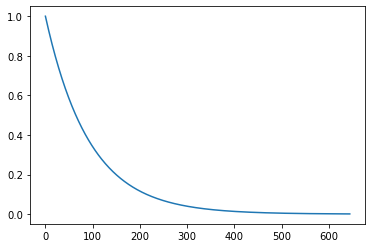

In [56]:
V_CME = np.zeros((n_state,1))
# V_prod = np.zeros_like(labels)[:,np.newaxis]
# V_prod = np.zeros((Dy.shape[0],1))
V_prod = np.zeros((len(dict_inds),1))

Dy_inds = dataset[dict_inds,2]

theta = 0.001
max_iter = 10000
err = np.infty

gamma = 0.99

iter = 0

deltas_CME = []

CME_policy = np.zeros(n_state)
while iter<max_iter and err>theta:
    if not iter%100:
        print(iter)
    V_temp = np.zeros_like(V_CME)
    # print('V_temp')
    # print(V_temp)
    # print('V')
    # print(V)
    # V_prod = V[labels]
    # V_prod = V[np.squeeze(Dy)]
    V_prod = V_CME[np.squeeze(Dy_inds)]
    for state in range(n_state):
        max_buffer = np.zeros(n_action)
        for action in range(n_action):
            max_buffer[action] = rewards[state][action] + gamma*(alphas_new[state][action]@V_prod)
        V_temp[state] = np.max(max_buffer)
        CME_policy[state] = np.argmax(max_buffer)
    # print('V_temp')
    # print(V_temp)
    err = np.max(np.abs(V_CME-V_temp))
    deltas_CME.append(err)
    V_CME = V_temp    
    iter = iter+1

plt.plot(deltas_CME)

In [49]:
V_VI = np.zeros(n_state)

theta = 0.001
max_iter = 10000
err = np.infty

gamma = 0.99

iter = 0

deltas = []

VI_policy = np.zeros(n_state)
while iter<max_iter and err>theta:
    if not iter%100:
        print(iter)
    V_temp = np.zeros_like(V_VI)
    # print('V_temp')
    # print(V_temp)
    # print('V')
    # print(V)
    for state in range(n_state):
        # V_prod[labels] = V[labels]
        max_buffer = np.zeros(n_action)
        for action in range(n_action):
            max_buffer[action] = rewards[state][action] + gamma*(np.dot(V_VI,t_matrix[state][action]))
        V_temp[state] = np.max(max_buffer)
        VI_policy[state] = np.argmax(max_buffer)
    # print('V_temp')
    # print(V_temp)
    err = np.max(np.abs(V_VI-V_temp))
    deltas.append(err)
    V_VI = V_temp    
    iter = iter+1

deltas = np.array(deltas)

0
100
200
300
400
500
600


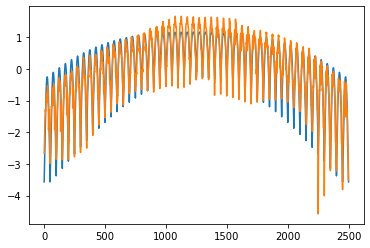

In [57]:
plt.plot((V_VI-np.mean(V_VI))/np.std(V_VI))
plt.plot((V_CME-np.mean(V_CME))/np.std(V_CME))

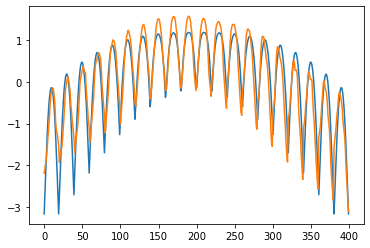

In [22]:
plt.plot((V_VI-np.mean(V_VI))/np.std(V_VI))
plt.plot((V_CME-np.mean(V_CME))/np.std(V_CME))

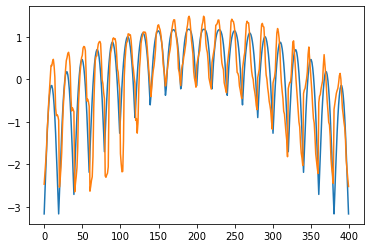

In [11]:
plt.plot((V_VI-np.mean(V_VI))/np.std(V_VI))
plt.plot((V_CME-np.mean(V_CME))/np.std(V_CME))

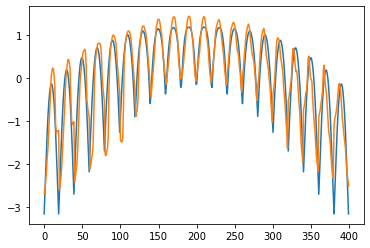

In [14]:
plt.plot((V_VI-np.mean(V_VI))/np.std(V_VI))
plt.plot((V_CME-np.mean(V_CME))/np.std(V_CME))

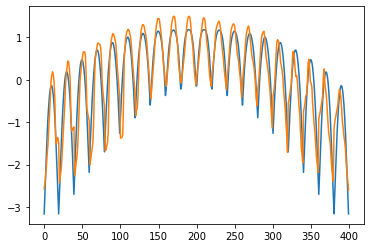

In [17]:
plt.plot((V_VI-np.mean(V_VI))/np.std(V_VI))
plt.plot((V_CME-np.mean(V_CME))/np.std(V_CME))

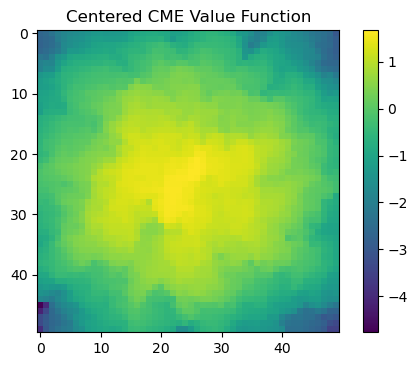

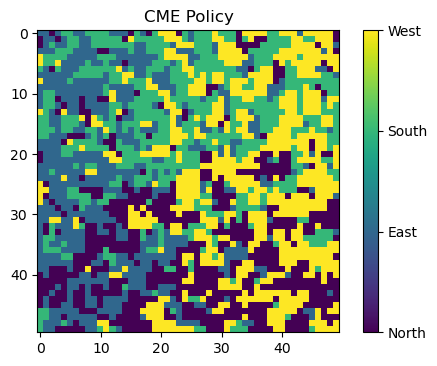

In [51]:
V_CME2d = np.reshape((V_CME-np.mean(V_CME))/(np.std(V_CME)),(grid_dim,grid_dim))
plt.figure(dpi=100)
plt.imshow(V_CME2d)
plt.colorbar()
plt.title('Centered CME Value Function')
CME_pol2d = np.reshape(CME_policy,(grid_dim,grid_dim))
plt.figure(dpi=100)
plt.imshow(CME_pol2d)
plt.title('CME Policy')
cbar = plt.colorbar(ticks=[0,1,2,3]);
cbar.ax.set_yticklabels(['North', 'East', 'South', 'West']);

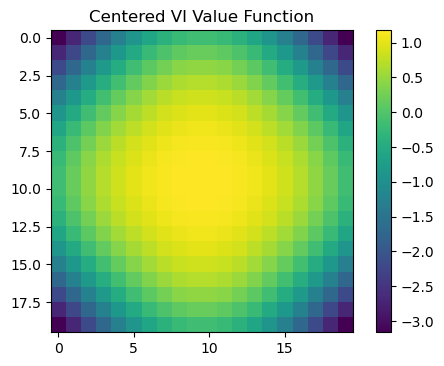

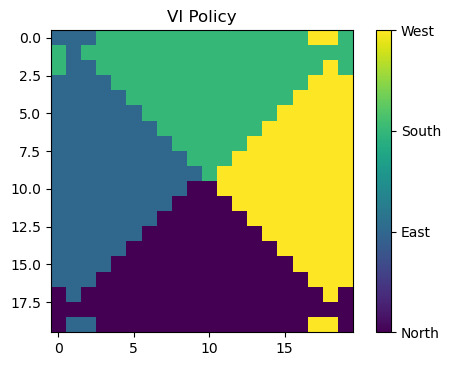

In [23]:
V_VI2d = np.reshape((V_VI-np.mean(V_VI))/np.std(V_VI),(grid_dim,grid_dim))
plt.figure(dpi=100)
plt.imshow(V_VI2d)
plt.colorbar()
plt.title('Centered VI Value Function')
CME_pol2d = np.reshape(CME_policy,(grid_dim,grid_dim))
VI_pol2d = np.reshape(VI_policy,(grid_dim,grid_dim))
plt.figure(dpi=100)
plt.imshow(VI_pol2d)
plt.title('VI Policy')
cbar = plt.colorbar(ticks=[0,1,2,3]);
cbar.ax.set_yticklabels(['North', 'East', 'South', 'West']);